# Student information
  •	Name: Alyan Khan

  •	Student Id: GH1041069

# **Machine Learning Project:**
# **Netflix Filter Bubble Analysis**

**Problem Statement:**  
Why You’re Stuck Watching the Same Stuff
Imagine this: You love romantic comedies, so Netflix keeps suggesting To All the Boys I’ve Loved Before… over and over. Meanwhile, your friend gets horror picks like Stranger Things. Neither of you ever see The Crown or Black Mirror. That’s the filter bubble.

Netflix’s algorithm traps us in endless loops of similar content. You might never discover a hidden gem like a quirky British comedy or a thought-provoking documentary because the algorithm assumes you only want more of what you’ve already watched.

**Why It Matters:**  
You miss out on diverse stories and perspectives and Repetitive recommendations lead to subscription fatigue and Never exploring global cinema? The algorithm won’t push you to.
Identifying bubble content can help the recommendation team diversify suggestions, improving user experience and potentially increasing retention.

In [57]:
import pandas as pd

Dataset:
We use the “Netflix Movies and TV Shows” dataset from Kaggle. (https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows)

Read Dataset

In [58]:
data = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for null values in data

In [59]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Remove the missing values (clean the data)

In [60]:
data['director'] = data['director'].replace(' ?', 'Unknown')
data['director'] = data['director'].replace(' NaN', 'Unknown')
data['cast'] = data['cast'].replace(' ?', 'Unknown')
data['cast'] = data['cast'].replace(' NaN', 'Unknown')
data['country'] = data['country'].replace(' ?', 'Unknown')
data['country'] = data['country'].replace(' NaN', 'Unknown')
data['date_added'] = data['date_added'].replace(' ?', 'Unknown')
data['date_added'] = data['date_added'].replace(' NaN', 'Unknown')
data['rating'] = data['rating'].replace(' ?', 'Unknown')
data['rating'] = data['rating'].replace(' NaN', 'Unknown')
data['duration'] = data['duration'].replace(' ?', 'Unknown')
data['duration'] = data['duration'].replace(' NaN', 'Unknown')

Define Features

In [61]:
features = data[['type', 'release_year', 'rating', 'listed_in']].copy()

genre_counts = features['listed_in'].value_counts()
median_count = genre_counts.median()
features['filter_bubble'] = features['listed_in'].apply(
    lambda x: 1 if genre_counts[x.split(',')[0].strip()] > median_count else 0
)


KeyError: 'Crime TV Shows'

The genre_counts where keys are genres and values are their frequencies in the dataset and the median_count median frequency of all genres.

If the genre’s frequency exceeds the median, it’s marked as 1 (over-represented, part of the filter bubble).

Otherwise, it’s marked as 0 (under-represented, niche).


Resolve error.

In [67]:
features = data[['type', 'release_year', 'rating', 'listed_in']].copy()

features['primary_genre'] = features['listed_in'].apply(
    lambda x: x.split(',')[0].strip() if isinstance(x, str) else "Unknown"
)
genre_counts = features['primary_genre'].value_counts()
features['filter_bubble'] = features['primary_genre'].apply(
    lambda x: 1 if genre_counts[x] > genre_counts.median() else 0
)

features = features.drop(['listed_in', 'primary_genre'], axis=1)

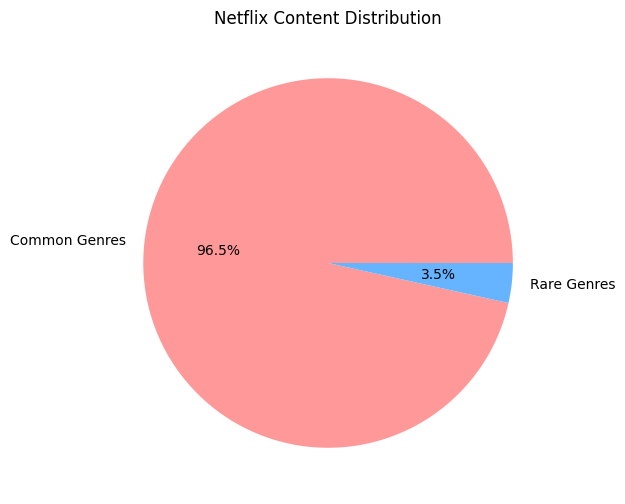

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
features['filter_bubble'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Common Genres', 'Rare Genres'],
    colors=['#ff9999','#66b3ff'],
    ylabel=''
)
plt.title('Netflix Content Distribution')
plt.show()

Prepare Data for Modeling

Convert categorical variables

In [69]:
# One-hot encode categorical variables: 'type' and 'rating'
features = pd.get_dummies(features, columns=['type', 'rating'], drop_first=True)

# Split data

In [70]:
from sklearn.model_selection import train_test_split
X = features.drop('filter_bubble', axis=1)
Y = features['filter_bubble']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (6166, 19)
x_test: (2643, 19)
y_train: (6166,)
y_test: (2643,)


Logistic Regression Model

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(x_train, y_train)

# Make predictions using the fitted model
y_test_pred_logistic = logistic_regression.predict(x_test)

print(f"Score for Logistic Regression: {logistic_regression.score(x_test, y_test)}")
accuracy_lg = accuracy_score(y_test, y_test_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
class_report = classification_report(y_test, y_test_pred_logistic)

print(f"Accuracy: {accuracy_lg}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Score for Logistic Regression: 0.9595157018539539
Accuracy: 0.9595157018539539
Confusion Matrix:
[[   0  107]
 [   0 2536]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.96      1.00      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.48      0.50      0.49      2643
weighted avg       0.92      0.96      0.94      2643



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naive_bayes = GaussianNB()

naive_bayes.fit(x_train, y_train)

y_test_pred_naive_bayes = naive_bayes.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_test_pred_naive_bayes)
conf_matrix = confusion_matrix(y_test, y_test_pred_naive_bayes)
class_report = classification_report(y_test, y_test_pred_naive_bayes)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.13318199016269391
Confusion Matrix:
[[ 103    4]
 [2287  249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.96      0.08       107
           1       0.98      0.10      0.18      2536

    accuracy                           0.13      2643
   macro avg       0.51      0.53      0.13      2643
weighted avg       0.95      0.13      0.17      2643



SVM

In [93]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(x_train, y_train)

y_test_pred_svm = svm_classifier.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
class_report = classification_report(y_test, y_test_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9595157018539539
Confusion Matrix:
[[   0  107]
 [   0 2536]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.96      1.00      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.48      0.50      0.49      2643
weighted avg       0.92      0.96      0.94      2643



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisition_tree_classifiiers = DecisionTreeClassifier()

decisition_tree_classifiiers.fit(x_train, y_train)
y_test_pred_decision_tree = decisition_tree_classifiiers.predict(x_test)

accuracy_decision_tree = accuracy_score(y_test, y_test_pred_decision_tree)
conf_matrix = confusion_matrix(y_test, y_test_pred_decision_tree)
class_report = classification_report(y_test, y_test_pred_decision_tree)

print(f"Accuracy: {accuracy_decision_tree}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9595157018539539
Confusion Matrix:
[[   2  105]
 [  13 2523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.02      0.03       107
           1       0.96      0.99      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.55      0.51      0.50      2643
weighted avg       0.93      0.96      0.94      2643



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
y_test_knn_pred = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_test_knn_pred)
conf_matrix = confusion_matrix(y_test, y_test_knn_pred)
class_report = classification_report(y_test, y_test_knn_pred)

print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9595157018539539
Confusion Matrix:
[[   0  107]
 [   1 2535]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.96      1.00      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.48      0.50      0.49      2643
weighted avg       0.92      0.96      0.94      2643



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)
y_test_rf_pred = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_test_rf_pred)
conf_matrix = confusion_matrix(y_test, y_test_rf_pred)
class_report = classification_report(y_test, y_test_rf_pred)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9595157018539539
Confusion Matrix:
[[   2  105]
 [   9 2527]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.02      0.03       107
           1       0.96      1.00      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.57      0.51      0.51      2643
weighted avg       0.93      0.96      0.94      2643



Ensemble Learning using Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
], voting='soft')

ensemble.fit(x_train, y_train)
y_test_ensemble_preds = ensemble.predict(x_test)

accuracy_ensemble = accuracy_score(y_test, y_test_ensemble_preds)
conf_matrix = confusion_matrix(y_test, y_test_ensemble_preds)
class_report = classification_report(y_test, y_test_ensemble_preds)

print(f"Accuracy: {accuracy_ensemble}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9595157018539539
Confusion Matrix:
[[   0  107]
 [   0 2536]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.96      1.00      0.98      2536

    accuracy                           0.96      2643
   macro avg       0.48      0.50      0.49      2643
weighted avg       0.92      0.96      0.94      2643



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Store all the accuracy results

In [94]:
results = {}
results['LogisticRegression'] = accuracy_lg
results['NaiveBayes'] = accuracy_nb
results['SVM'] = accuracy_svm
results['DecisionTree'] = accuracy_decision_tree
results['KNN'] = accuracy_knn
results['RandomForest'] = accuracy_rf
results['Ensemble'] = accuracy_ensemble

Convert results to DataFrame for better visualization

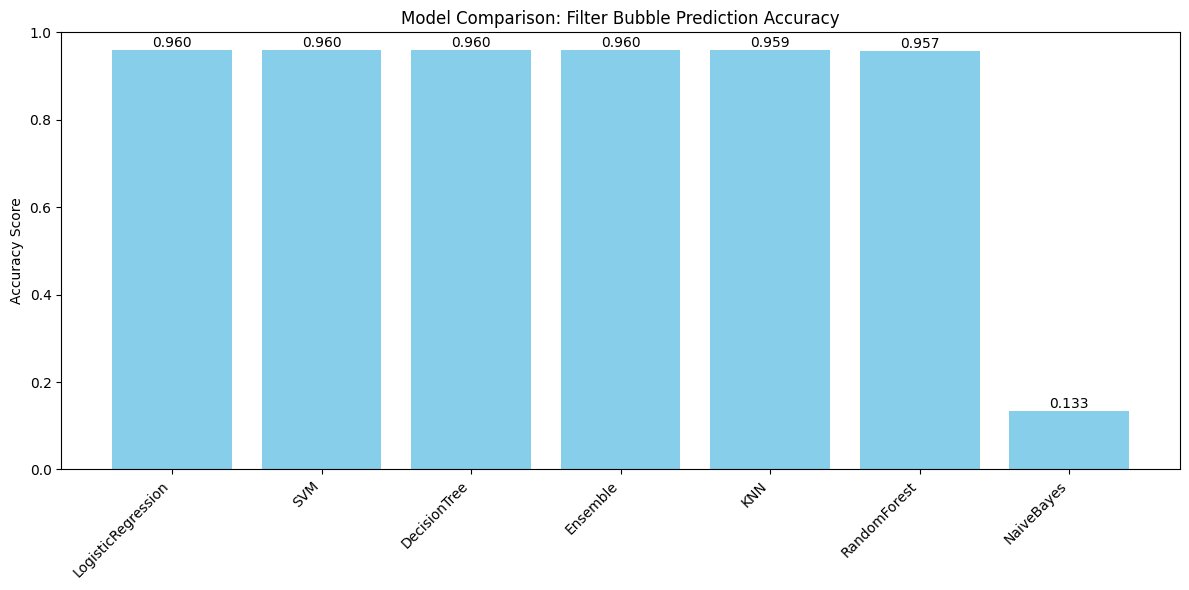


Model Accuracy Comparison:
             Model  Accuracy
LogisticRegression  0.959516
               SVM  0.959516
      DecisionTree  0.959516
          Ensemble  0.959516
               KNN  0.959137
      RandomForest  0.956867
        NaiveBayes  0.133182


In [95]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plot comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison: Filter Bubble Prediction Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display table
print("\nModel Accuracy Comparison:")
print(results_df.to_string(index=False))

# **Summary of the Pipeline:**

1. **Problem Definition:**  
    We framed the filter bubble problem as identifying titles that belong to an over-represented genre in Netflix. This serves as a proxy for the phenomenon where similar content is repeatedly recommended, potentially limiting diversity.

2. **Data Exploration & Cleaning:**  
    We inspected the dataset, handled missing values (e.g., filling missing ratings with "Unknown"), converted dates, and parsed the duration. We also extracted the primary genre from the 'listed_in' column.

3. **Feature Engineering:**  
    We selected features that are most likely to influence the recommendation patterns (e.g., type, release year, duration, and rating) and encoded categorical variables using one-hot encoding.

4. **Modeling:**  
    We compared several machine learning algorithms:
     - **Linear Regression:** Used as a baseline (with thresholding).
     - **Logistic Regression, Naive Bayes, SVM, Decision Tree, KNN, Random Forest:** Each was trained and evaluated.
     - **Ensemble (Voting Classifier):** Combined multiple models to potentially capture complementary strengths.

5. **Evaluation:**  
    We used accuracy, classification reports, and confusion matrices to compare models. A bar plot visualizes the accuracy of each approach.

The pipeline is comprehensive, modular, and interpretable. It allows the team to identify which features (like type, release year, or rating) may contribute to filter bubbles.

**Limitations:**  
  The target variable is a proxy measure rather than a direct measure of filter bubble effects. Future work could integrate user viewing data and recommendation logs for a more direct approach.

**Recommendations:**  
  Based on model performance (with the ensemble or the best-performing individual model), the recommendation system can be adjusted to consider diversity. For instance, if certain over-represented genres are dominating, the algorithm can be tweaked to include diverse genres in the recommendations.
